In [1]:
%pylab inline
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.plotting import gridplot, figure
from bokeh.charts import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
output_notebook()

Loading BokehJS ...

# Problem 1: Decision Trees

In [3]:
dtData = np.array(
[[0,0,1,1,0,-1],
[1,1,0,1,0,-1],
[0,1,1,1,1,-1],
[1,1,1,1,0,-1],
[0,1,0,0,0,-1],
[1,0,1,1,1,1],
[0,0,1,0,0,1],
[1,0,0,0,0,1],
[1,0,1,1,0,1],
[1,1,1,1,1,-1]])
X = dtData[:,:-1]
Y = dtData[:,-1]

## (a) Calculate the entropy of the class variable y

In [4]:
def entrophy(Y): # for Y = 1 or -1, two outcomes
    prob = np.mean(Y==1)
    if prob == 0: return (1-prob)*np.log2(1/(1-prob))
    return -prob*np.log2(prob) - (1-prob)*np.log2(1-prob)
Hy = entrophy(Y)
print("the entropy of the class variable y is: ", Hy)

the entropy of the class variable y is:  0.970950594455


## (b) Calculate the information gain for each feature xi. Which feature should I split on first?

In [5]:
def IGain(dtData, Hy, xi):
    x1 = dtData[dtData[:,xi]==1]
    x0 = dtData[dtData[:,xi]==0]
    p1 = np.mean(dtData[dtData[:,xi]==1])
    p0 = np.mean(dtData[dtData[:,xi]==0])
    return Hy - (p1*entrophy(x1[:,-1])+p0*entrophy(x0[:,-1]))

bestX = None
bestIG = None
for xi in range(np.size(X,1)):
    curIG = IGain(dtData, Hy, xi)
    print("Information gain for feature %d: %f"%(xi+1, curIG))
    if bestIG == None or bestIG < curIG:
        bestIG = curIG
        bestX = xi
print("best feature to split first: ", bestX+1)
print("IG for this feature: ", bestIG)


Information gain for feature 1: 0.212576
Information gain for feature 2: 0.634051
Information gain for feature 3: 0.250813
Information gain for feature 4: 0.314774
Information gain for feature 5: 0.030344
best feature to split first:  2
IG for this feature:  0.634050816841


## (c) Draw the complete decision tree that will be learned from these data.

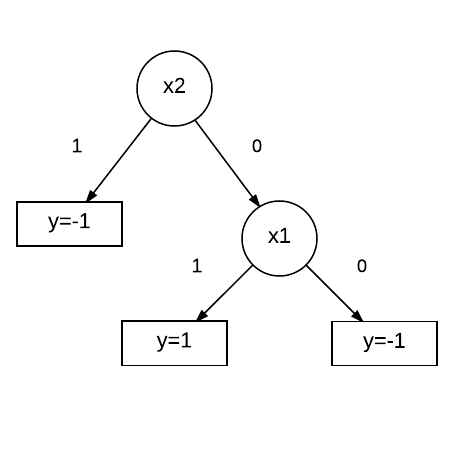

In [6]:
from IPython.display import Image
Image(filename='imgs/hw4-1.png')

# Problem 2: Decision Trees on Kaggle

## (a) Load the training data, X_train.txt and Y_train.txt.

In [34]:
X = np.genfromtxt("data/X_train.txt",delimiter=None)
Y = np.genfromtxt("data/Y_train.txt",delimiter=None)
Xt = X[:10000, :]
Yt = Y[:10000]
Xv = X[10001:20001,:]
Yv = Y[10001:20001]

## (b) Learn a decision tree classifier on the data.

In [35]:
import mltools as ml

In [9]:
learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=50)
print("training error rate: ", learner.err(Xt, Yt))
print("validation error rate: ", learner.err(Xv, Yv))

training error rate:  0.0047
validation error rate:  0.3816


## (c) Now, try varying the maximum depth parameter

In [10]:
trainErr = []
valErr = []
depths = np.arange(16)
minValErr = 1
bestDepth = -1
for i in depths:
    learner = ml.dtree.treeClassify(Xt,Yt, maxDepth=i)
    tr = learner.err(Xt, Yt)
    vr = learner.err(Xv, Yv) 
    trainErr.append(tr)
    valErr.append(vr)
    print("depth = %d trainErr = %f valErr = %f"%(i, tr, vr))
    if minValErr > vr: 
        minValErr = vr
        bestDepth = i

depth = 0 trainErr = 0.341800 valErr = 0.342000
depth = 1 trainErr = 0.341800 valErr = 0.342000
depth = 2 trainErr = 0.322300 valErr = 0.319100
depth = 3 trainErr = 0.313300 valErr = 0.312600
depth = 4 trainErr = 0.310500 valErr = 0.315200
depth = 5 trainErr = 0.300800 valErr = 0.310200
depth = 6 trainErr = 0.294900 valErr = 0.310300
depth = 7 trainErr = 0.287200 valErr = 0.311800
depth = 8 trainErr = 0.277000 valErr = 0.313000
depth = 9 trainErr = 0.263200 valErr = 0.318600
depth = 10 trainErr = 0.245500 valErr = 0.324300
depth = 11 trainErr = 0.230900 valErr = 0.325800
depth = 12 trainErr = 0.208800 valErr = 0.334400
depth = 13 trainErr = 0.192300 valErr = 0.343100
depth = 14 trainErr = 0.164800 valErr = 0.343900
depth = 15 trainErr = 0.145400 valErr = 0.357500


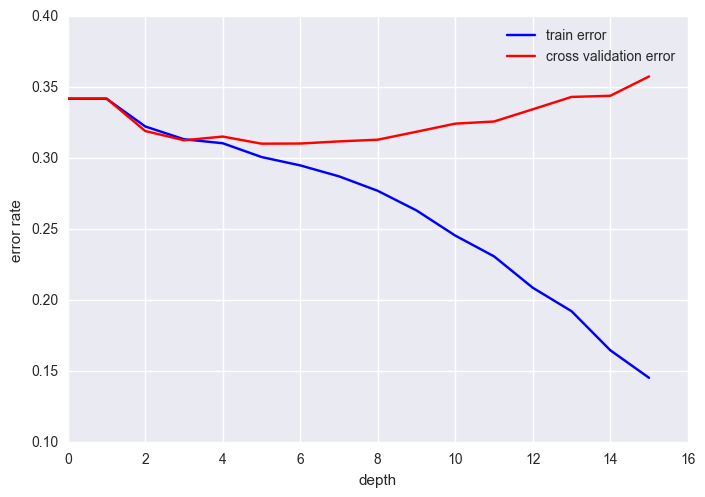

In [11]:
plt.plot(depths, trainErr, color="blue", label = "train error")
plt.plot(depths,valErr, color = "red", label = "cross validation error")
plt.ylabel("error rate")
plt.xlabel("depth")
plt.legend()
plt.show()

In [12]:
print("The complexity is increasing with the depth cutoff.\n \
The model begins overfitting at depth = %d because\n \
the cross validation error begins to increase as \n \
the train error is continue to decrease.\n"%(bestDepth))

print("I would select depth= %d because it has the\n\
lowest cross validation error rate %f."%(
        bestDepth, minValErr))

The complexity is increasing with the depth cutoff.
 The model begins overfitting at depth = 5 because
 the cross validation error begins to increase as 
 the train error is continue to decrease.

I would select depth= 5 because it has the
lowest cross validation error rate 0.310200.


## (d) Now, using high maximum depth (d = 50), use minLeaf to control complexity.

In [13]:
#use minLeaf to control complexity.
minLeaves = np.power(2,np.arange(2,13))
trainErr = []
valErr = []
mintest = 1
minl = -1
for minLeaf in minLeaves:
    learner = ml.dtree.treeClassify(
        Xt,Yt, maxDepth=50, minLeaf=minLeaf)
    tr = learner.err(Xt, Yt)
    vr = learner.err(Xv, Yv) 
    trainErr.append(tr)
    valErr.append(vr)
    print("minLeaf = %d trainErr = %f valErr = %f"%(minLeaf, tr, vr))
    if mintest > vr:
        mintest = vr
        minl = minLeaf

minLeaf = 4 trainErr = 0.096400 valErr = 0.379400
minLeaf = 8 trainErr = 0.169200 valErr = 0.375500
minLeaf = 16 trainErr = 0.225600 valErr = 0.354600
minLeaf = 32 trainErr = 0.263700 valErr = 0.333500
minLeaf = 64 trainErr = 0.289900 valErr = 0.327600
minLeaf = 128 trainErr = 0.301200 valErr = 0.311900
minLeaf = 256 trainErr = 0.308500 valErr = 0.317200
minLeaf = 512 trainErr = 0.313500 valErr = 0.312700
minLeaf = 1024 trainErr = 0.322300 valErr = 0.319100
minLeaf = 2048 trainErr = 0.341800 valErr = 0.342000
minLeaf = 4096 trainErr = 0.341800 valErr = 0.342000


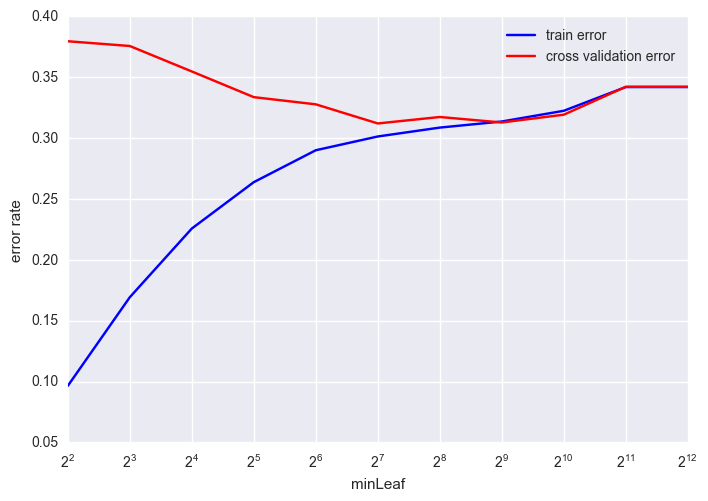

In [14]:
plt.semilogx(minLeaves, trainErr, color="blue",
             basex=2, label = "train error")
plt.semilogx(minLeaves,valErr, color = "red",
             basex=2, label = "cross validation error")
plt.ylabel("error rate")
plt.xlabel("minLeaf")
plt.legend()
plt.show()

In [15]:
print("The complexity is decreasing as minLeaf grows.\n\
The model is overfitting when minLeaf is between=4 and %d\n\
because the cross validation error rate is decreasing as\n\
train error rate increases until minLeaf = %d\n"%(minl,minl))

print("I would select minLeaf = %d because it has the\n\
lowest cross validation error rate %f."%(
        minl, minValErr))

The complexity is decreasing as minLeaf grows.
The model is overfitting when minLeaf is between=4 and 128
because the cross validation error rate is decreasing as
train error rate increases until minLeaf = 128

I would select minLeaf = 128 because it has the
lowest cross validation error rate 0.310200.


## (e) (Not graded) minParent

In [16]:
#use minParent to control complexity.
minParents = np.power(2,np.arange(2,13))
trainErr = []
valErr = []
mintest = 1
bestP = -1
for minParent in minParents:
    learner = ml.dtree.treeClassify(
        Xt,Yt, maxDepth=50, minParent=minParent)
    tr = learner.err(Xt, Yt)
    vr = learner.err(Xv, Yv) 
    trainErr.append(tr)
    valErr.append(vr)
    print("minParent = %d trainErr = %f valErr = %f"%(minParent, tr, vr))
    if mintest > vr:
        mintest = vr
        bestP = minParent

minParent = 4 trainErr = 0.023300 valErr = 0.379600
minParent = 8 trainErr = 0.062400 valErr = 0.375800
minParent = 16 trainErr = 0.117900 valErr = 0.370900
minParent = 32 trainErr = 0.183000 valErr = 0.365400
minParent = 64 trainErr = 0.225500 valErr = 0.346700
minParent = 128 trainErr = 0.262100 valErr = 0.334300
minParent = 256 trainErr = 0.282100 valErr = 0.319700
minParent = 512 trainErr = 0.302000 valErr = 0.312100
minParent = 1024 trainErr = 0.307800 valErr = 0.314900
minParent = 2048 trainErr = 0.321800 valErr = 0.319200
minParent = 4096 trainErr = 0.341800 valErr = 0.342000


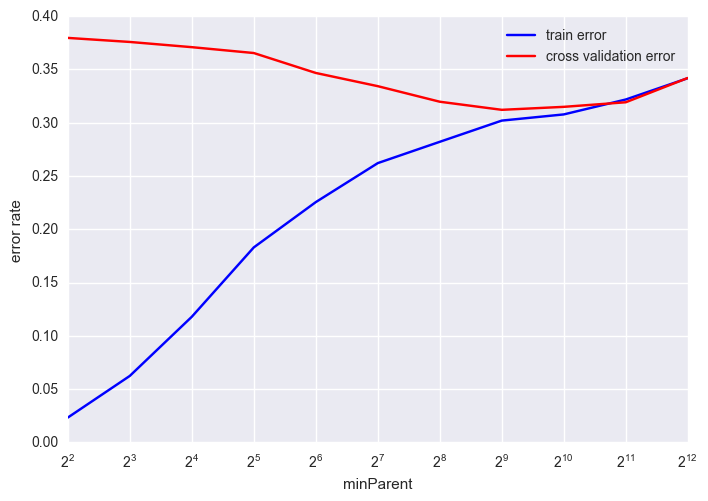

In [17]:
plt.semilogx(minParents, trainErr, color="blue",
             basex=2, label = "train error")
plt.semilogx(minParents,valErr, color = "red",
             basex=2, label = "cross validation error")
plt.ylabel("error rate")
plt.xlabel("minParent")
plt.legend()
plt.show()

In [18]:
print("The complexity is decreasing as minParent grows.\n\
The model is overfitting when minParent is between=4 and %d\n\
because the cross validation error rate is decreasing as\n\
train error rate increases until minLeaf = %d\n"%(bestP,bestP))

print("I would select minLeaf = %d because it has the\n\
lowest cross validation error rate %f."%(
        bestP, minValErr))

The complexity is decreasing as minParent grows.
The model is overfitting when minParent is between=4 and 512
because the cross validation error rate is decreasing as
train error rate increases until minLeaf = 512

I would select minLeaf = 512 because it has the
lowest cross validation error rate 0.310200.


The minParent has similar bahavior with the minLeaf,
but the overfit period lasts longer than the minLeaf as the value of minParent (minLeaf) grows.

## (f) Compute and plot the ROC curve for your trained model and the area under the curve

In [19]:
learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=50)

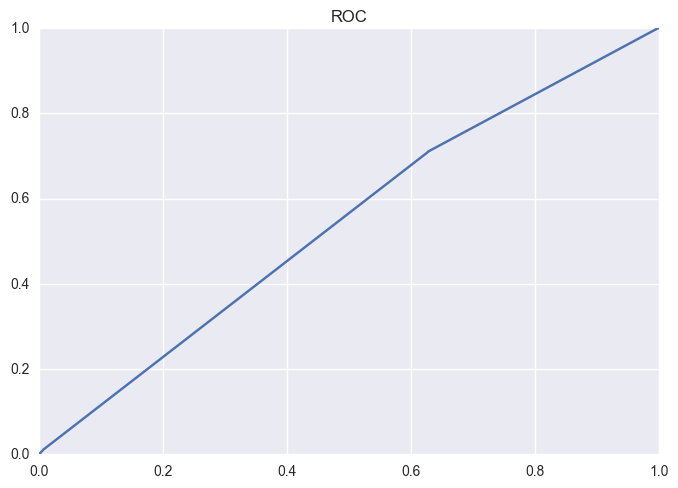

In [20]:
fpr, tpr, tnr = learner.roc(Xv, Yv)
plt.plot(fpr, tpr)
plt.title("ROC")
plt.show()

In [21]:
# compute auc
print("the area under the curve (auc) is:",
      learner.auc(Xv, Yv))

the area under the curve (auc) is: 0.581280350699


## (g)

In [36]:
# Load the test features
Xte = np.genfromtxt("data/X_test.txt",delimiter=None)

In [37]:
# use best complexity control value for depth
learner =  ml.dtree.treeClassify(Xt, Yt, maxDepth=bestDepth)

In [38]:
# make predictions on all 200k test points.
Ypred = learner.predictSoft( Xte )
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Yhat_dtree.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

In [39]:
print("the AUC for validation data is: ",
     learner.auc(Xv, Yv))

the AUC for validation data is:  0.64949685828


Kaggle Score: 0.64982

# Problem 3: Random Forests

## (a) Using your validation split, learn a bagged ensemble of decision trees on the training data and evaluate validation performance.

In [40]:
# Load data set X, Y for training the ensemble…
nBag = 25
m,n = Xv.shape
classifiers = [ None ] * nBag # Allocate space for learners
# Allocate space for predictions from each model
predictTrain = np.zeros( (Xt.shape[0], nBag) ) 
predictVal = np.zeros( (Xv.shape[0], nBag) ) 
for i in range(nBag):
    # Bootstrap sample a data set select the data at those indices
    Xi, Yi = ml.bootstrapData(Xt, Yt) 
    # Train a model on data Xi, Yi
    classifiers[i] = ml.dtree.treeClassify(
        Xi, Yi, maxDepth=15 ,minLeaf=4) 
    # Apply each classifier
    predictTrain[:,i] = classifiers[i].predict(Xt)
    predictVal[:,i] = classifiers[i].predict(Xv)


In [41]:
errTrain = []
errVal  = []
nLearner = [1,5,10,25]
for i in nLearner:
    eTr = np.mean(Yt!= (np.mean(predictTrain[:,:i], axis=1) >0.5 ))
    eVal = np.mean(Yv!= (np.mean(predictVal[:,:i], axis=1) >0.5))
    print("eTr: %f \t eVal: %f"%(eTr, eVal))
    errTrain.append(eTr)
    errVal.append(eVal)

eTr: 0.240100 	 eVal: 0.358700
eTr: 0.181300 	 eVal: 0.329300
eTr: 0.180300 	 eVal: 0.311600
eTr: 0.162700 	 eVal: 0.305300


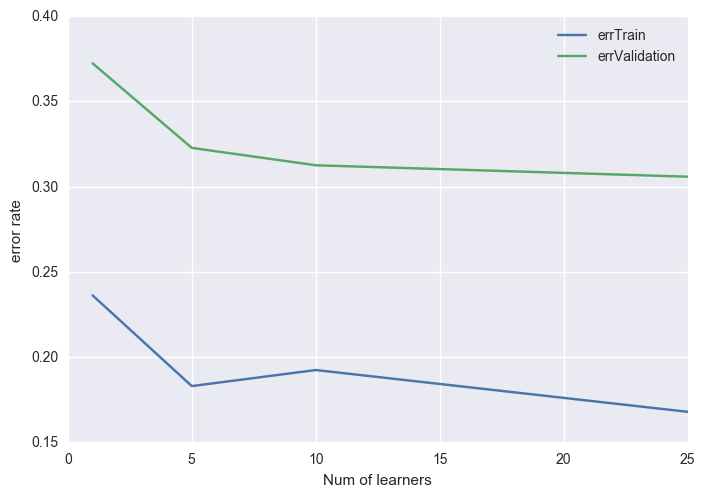

In [28]:
plt.plot(nLearner, errTrain, label="errTrain")
plt.plot(nLearner, errVal, label="errValidation")
plt.legend()
plt.xlabel("Num of learners")
plt.ylabel("error rate")
plt.show()

## (b) Now choose an ensemble size and build an ensemble using at least 10k training data points
make predictions on the test data, and upload to Kaggle.

In [46]:
Xt = X[:90000, :]
Yt = Y[:90000]
Xv = X[90001:,:]
Yv = Y[90001:]

In [47]:
# choose ensemble size =25 becasue it has the best performence.
nEnsemble = 25
# Allocate space for predictions from each model
Ypred = np.zeros( (Xte.shape[0], nEnsemble) ) 
aucVal = [None]*nEnsemble
for i in range(nEnsemble):
    # Bootstrap sample a data set select the data at those indices
    Xi, Yi = ml.bootstrapData(Xt, Yt) 
    # Train a model on data Xi, Yi
    classifiers[i] = ml.dtree.treeClassify(
        Xi, Yi, maxDepth=15 ,minLeaf=4) 
    # Apply each classifier
    Ypred[:,i] = classifiers[i].predictSoft(Xte)[:,1] 
    aucVal[i] = classifiers[i].auc(Xv,Yv)

In [48]:
# take the average of ensemble members' soft
# prediction scores
Ypred = np.mean(Ypred,axis=1)

In [49]:
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Yhat_forest2.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')

In [50]:
aucVal = np.mean(aucVal)

In [51]:
print("estimated AUC score on your validation data: ",
      aucVal)

estimated AUC score on your validation data:  0.652841147611


Kaggle score: 0.74048